In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
S07_path = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/process_data/S07_final_df.csv'

S07_df = pd.read_csv(S07_path, index_col=False, parse_dates=['DateTime'])

# Set 'DateTime' column as the index
S07_df.set_index('DateTime', inplace=True)

# Display the DataFrame
print(S07_df)

                    ID_instance      hrv_vlf       hrv_lf       hrv_hf  \
DateTime                                                                 
2023-07-18 14:52:46       S07_1   402.845449  1010.343906   505.534104   
2023-07-18 14:52:47       S07_1   528.815060  1137.349296   507.839937   
2023-07-18 14:52:48       S07_1   654.784671  1264.354687   510.145770   
2023-07-18 14:52:49       S07_1   780.754282  1391.360078   512.451603   
2023-07-18 14:52:50       S07_1   906.723893  1518.365469   514.757436   
...                         ...          ...          ...          ...   
2023-07-30 21:49:51      S07_38  1496.307656  1774.814580  1111.413582   
2023-07-30 21:49:52      S07_38  1496.307656  1774.814580  1111.413582   
2023-07-30 21:49:53      S07_38  1496.307656  1774.814580  1111.413582   
2023-07-30 21:49:54      S07_38  1496.307656  1774.814580  1111.413582   
2023-07-30 21:49:55      S07_38  1496.307656  1774.814580  1111.413582   

                      hrv_sdnn  hrv_r

In [3]:
# Group by 'id_instance' and calculate time duration
time_duration = S07_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S07_1      31.82
S07_10      7.15
S07_11     26.33
S07_12     40.40
S07_13     76.97
S07_14      8.87
S07_15     34.92
S07_16     50.03
S07_17     13.82
S07_18     11.48
S07_19     12.92
S07_2       8.78
S07_20      6.12
S07_21      4.87
S07_22     12.12
S07_23     13.60
S07_24     15.12
S07_25     24.28
S07_26     37.95
S07_27      4.03
S07_28     10.27
S07_29      5.87
S07_3       5.85
S07_30     15.12
S07_31      6.17
S07_32     11.43
S07_33     14.98
S07_34      7.72
S07_35     95.18
S07_36     32.75
S07_37     19.23
S07_38    124.63
S07_4      13.97
S07_5      26.80
S07_6      30.27
S07_7      11.85
S07_8      17.60
S07_9       6.88
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_16448\2987542596.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S07_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [4]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S07_df.drop(S07_df[S07_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [5]:
S07_df.isnull().sum()

ID_instance          37
hrv_vlf               0
hrv_lf                0
hrv_hf                0
hrv_sdnn              0
hrv_rmssd             0
hrv_mean_nni          0
hrv_median_nni        0
hrv_range_nni         0
hrv_entropy           0
eda_tonic_mean        0
eda_tonic_std         0
eda_tonic_sum         0
eda_tonic_energy      0
eda_phasic_mean       0
eda_phasic_std        0
eda_phasic_sum        0
eda_phasic_energy     0
acc_acc_x_min         0
acc_acc_y_min         0
acc_acc_z_min         0
acc_l2_min            0
acc_acc_x_max         0
acc_acc_y_max         0
acc_acc_z_max         0
acc_l2_max            0
acc_acc_x_ptp         0
acc_acc_y_ptp         0
acc_acc_z_ptp         0
acc_l2_ptp            0
Temp(C)_N1            0
RH(%)_N1              0
Dewpoint(C)_N1        0
Temp(C)_N2            0
RH(%)_N2              0
Dewpoint(C)_N2        0
Temp(C)_N3            0
RH(%)_N3              0
Dewpoint(C)_N3        0
Temp(C)_N4            0
RH(%)_N4              0
Dewpoint(C)_N4  

In [6]:
S07_df.dropna(subset=['ID_instance'], inplace=True)

In [7]:
S07_df['ID_instance'].unique()

array(['S07_1', 'S07_2', 'S07_3', 'S07_4', 'S07_5', 'S07_6', 'S07_7',
       'S07_8', 'S07_9', 'S07_10', 'S07_11', 'S07_12', 'S07_14', 'S07_15',
       'S07_16', 'S07_17', 'S07_18', 'S07_19', 'S07_20', 'S07_21',
       'S07_22', 'S07_23', 'S07_24', 'S07_25', 'S07_26', 'S07_27',
       'S07_28', 'S07_29', 'S07_30', 'S07_31', 'S07_32', 'S07_33',
       'S07_34', 'S07_36', 'S07_37'], dtype=object)

In [9]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S07_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S07_df.columns[30:42] 

# Calculating correlation matrix
correlation_matrix = S07_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,0.043046,-0.028340,0.081014,0.063549,-0.088409,0.038964,0.042044,-0.057170,0.048808,0.025386,-0.054151,0.051141
hrv_lf,0.058618,0.001735,0.095925,0.059143,-0.002059,0.051807,0.074014,-0.028314,0.049087,0.071483,-0.014809,0.074722
hrv_hf,-0.060798,0.159385,0.049763,-0.080418,0.171276,-0.026581,-0.033439,0.101164,0.014808,-0.022013,0.099594,0.014678
hrv_sdnn,0.011258,0.080784,0.131814,0.015263,0.060238,0.024901,0.035880,0.025975,0.060162,0.038665,0.030817,0.050755
hrv_rmssd,0.052614,0.066678,0.177376,0.028244,0.111036,0.068362,0.077804,0.021465,0.139741,0.093351,0.015500,0.108484
hrv_mean_nni,-0.271950,0.270243,-0.057420,-0.304972,0.334834,-0.244080,-0.266334,0.268165,-0.230411,-0.231024,0.261880,-0.281020
hrv_median_nni,-0.262661,0.262937,-0.044844,-0.297451,0.340397,-0.234858,-0.256646,0.259415,-0.218696,-0.218855,0.252037,-0.271569
hrv_range_nni,0.021205,0.066748,0.145031,0.034608,0.021011,0.027051,0.043561,0.013732,0.073296,0.048721,0.017968,0.054403
hrv_entropy,0.076309,-0.109913,0.013318,0.113522,-0.174608,0.017727,0.079112,-0.106902,0.043016,0.078525,-0.098127,0.055107
eda_tonic_mean,0.641475,-0.369064,0.521894,0.605567,-0.066659,0.669315,0.662310,-0.477171,0.646219,0.679810,-0.474273,0.662715


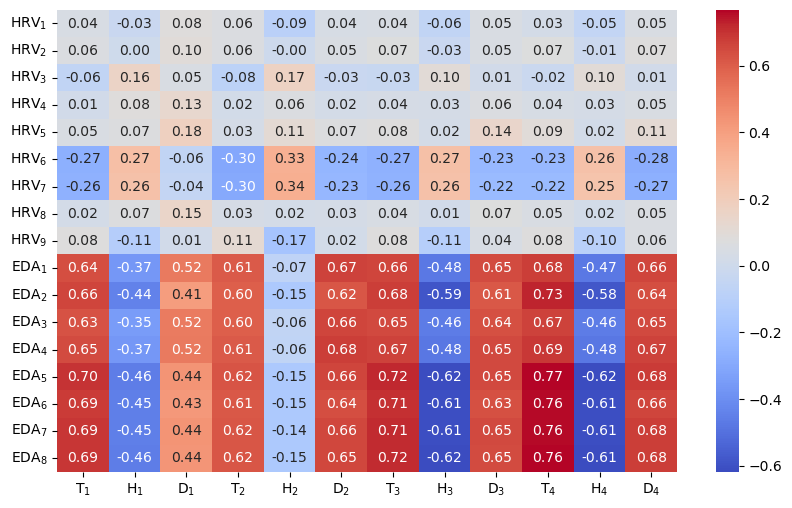

In [11]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S07')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/viz/'
plt.savefig(outpath+'S07_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S07_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


In [12]:
# Drop columns starting with 'acc_'
data = S07_df.filter(regex='^(?!acc_)')

In [8]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = data[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: data[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: data[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [data['Temp(C)_N1'].quantile(0.30), data['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [data['RH(%)_N1'].quantile(0.30), data['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return -1  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
data['lambda'] = data.apply(comfort_label, axis=1)
label_counts = data['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)


Variables considered for the comfort function:
HRV Variable: hrv_mean_nni
EDA Variable: eda_phasic_mean
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
 0    67.745598
-1    31.473585
 1     0.780817
Name: proportion, dtype: float64
